[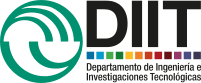](https://ingenieria.unlam.edu.ar/)   
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)
2025
[Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)   

---


# Enunciado

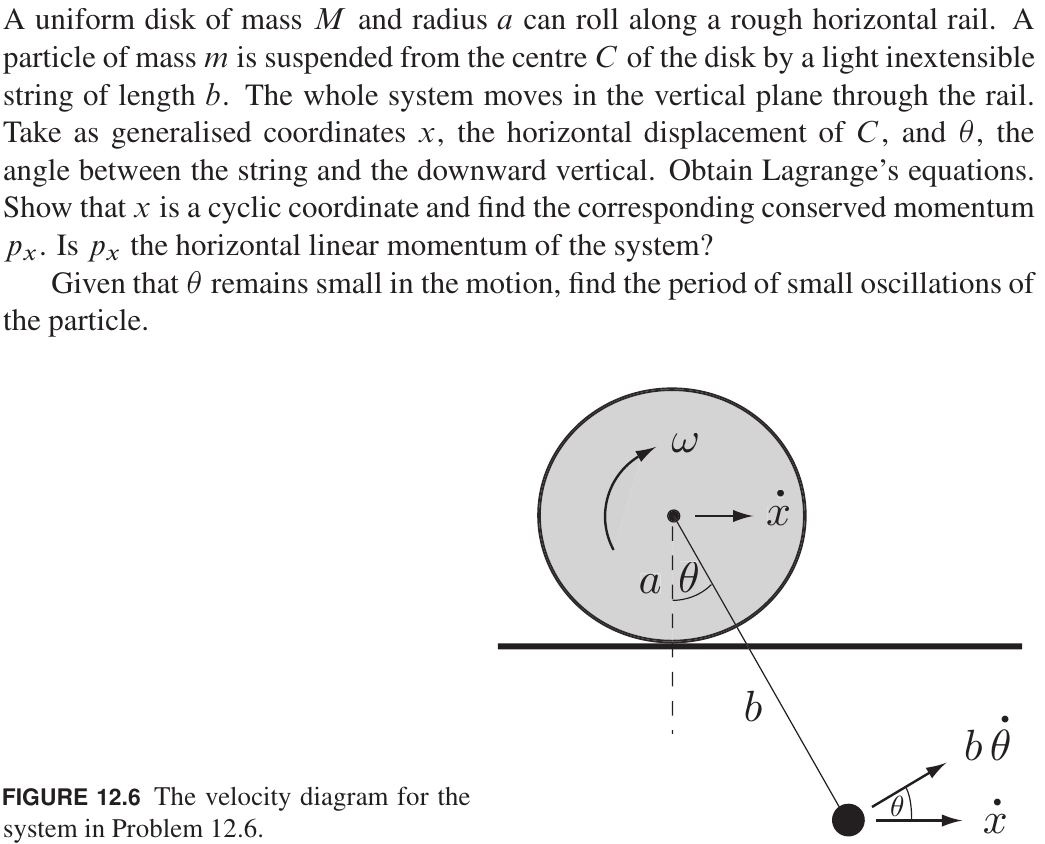

In [2]:
# módulo de cálculo simbólico
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting() # notación con puntos para derivadas temporales

In [3]:
# Defino los parámetros físicos del sistema
M, a, b, m, g = sm.symbols('M, a, b, m, g', positive=True)

# Defino coordenadas generalizadas
x, theta = me.dynamicsymbols('x, theta')

In [4]:
# Posiciones

# Marco de referencia inercial
N = me.ReferenceFrame('N') 
disco_r = x * N.x
péndulo_r = disco_r + b *( sm.sin(theta) * N.x + sm.cos(theta) * (-N.y))

## Energía

In [5]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sm.Eq(
        sm.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

In [6]:
disco_T = energíaCinéticaTraslación(M, disco_r, N)
disco_T

In [7]:
péndulo_T = energíaCinéticaTraslación(m, péndulo_r, N)
péndulo_T

In [8]:
def energíaCinéticaRotación(momentoDeInercia, velocidadAngular):
    """
    Calcula la energía cinética de un cuerpo extenso (no puntual) que rota en torno a un eje.

    Parámetros
    ----------
    momentoDeInercia : Multiplicación Sympy (sympy.core.mul.Mul)
        Expresada en referencia al eje de rotación para la velocidadAngular.
    velocidadAngular : Multiplicación Sympy (sympy.core.mul.Mul)
        Velocidad de rotación en torno a un eje.

    Retorna
    -------
    Igualdad Sympy (sympy.Equality)
        Energía cinética de rotación (I/2)* omega**2
    """
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5
    T_rotación = sm.Eq(
        sm.Symbol('T_{rotación}'),
        unMedio* momentoDeInercia* velocidadAngular**2
     ).simplify()
    return T_rotación

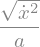

In [9]:
disco_r.dt(N).magnitude()/a

In [10]:
disco_momentoDeInercia = (M/2) * a**2
disco_omega = disco_r.dt(N).magnitude()/a
disco_T_rotación = energíaCinéticaRotación(disco_momentoDeInercia, disco_omega)
disco_T_rotación

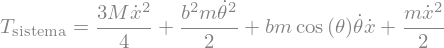

In [11]:
# Energía cinética total
sistema_T = sm.Eq(
    sm.Symbol('T_\mathrm{sistema}'),
    (disco_T.rhs + péndulo_T.rhs + disco_T_rotación.rhs).expand()
    ).simplify()
sistema_T

In [12]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sm.Eq(
        sm.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

In [13]:
péndulo_V = energíaPotencialGravitatoria(m, péndulo_r, -g * N.y)
péndulo_V

## Ecuaciones de Euler-Lagrange

In [14]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sm.Eq(
        lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        - lagrangiano.diff(coordenadaGeneralizada) 
        , 0
    ).simplify()

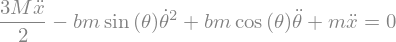

In [15]:
x_EL = eulerLagrange(sistema_T, péndulo_V, x)
x_EL

Para un lagrangiano típico de la forma:
$$
\mathcal{L} = T - V = \frac{1}{2}m\dot{q}^2 - V(q)
$$
donde $T$ es la energía cinética y $V$ es la energía potencial.

Calculando la derivada con respecto a $\dot{q}$:
$$
\frac{\partial \mathcal{L}}{\partial \dot{q}} = \frac{\partial}{\partial \dot{q}} \left( \frac{1}{2}m\dot{q}^2 \right) = m\dot{q}
$$
que es precisamente el momento (generalizado), $p_q$.

Puede verse que $x$ no aparece en la ecuación de Euler-Lagrange para $x$. 
Lo que le confiere la cualidad de ser coordenada cíclica.

$$
\begin{aligned}
\frac{\partial \mathcal{L} }{\partial x} &- \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} }=0 \\
& - \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} }=0 \\
\end{aligned}.
$$
Siendo la cantidad conservada $p_x = \frac{\partial \mathcal{L}}{\partial \dot{x}}$.


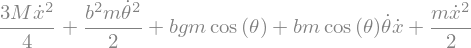

In [16]:
lagrangiano = (sistema_T.rhs - péndulo_V.rhs).expand()
lagrangiano

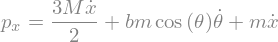

In [17]:
t = sm.Symbol('t')
x_p = sm.Eq(
    sm.Symbol('p_x'),
    lagrangiano.diff(x.diff(t)).simplify()
)
x_p


Euler-Lagrange para la coordenada generalizada $\theta$.

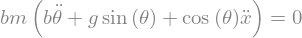

In [18]:
theta_EL = eulerLagrange(sistema_T, péndulo_V, theta)
theta_EL

## Pequeñas oscilaciones

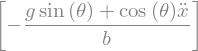

In [19]:
theta_sol = sm.solve(theta_EL, theta.diff(t, t))
theta_sol

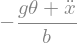

In [20]:
theta_sol[0].subs([(sm.sin(theta), theta), (sm.cos(theta), 1)]) 

## Resolución del sistema de aceleraciones

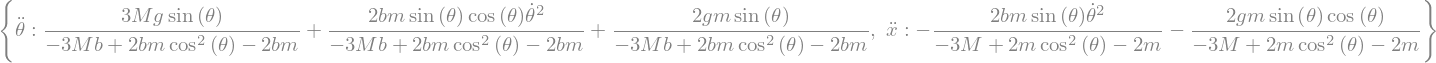

In [21]:
aceleraciones = sm.solve([x_EL, theta_EL], [x.diff(t, t), theta.diff(t, t)])
aceleraciones

## Integración numérica

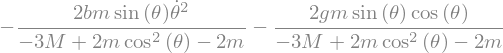

In [22]:
aceleraciones[x.diff(t,t)]

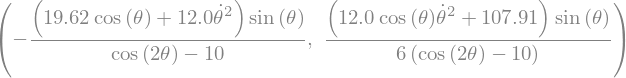

In [23]:
# parámetros_físicos
g_magnitud = 9.81 # [m s-2]
m_magnitud = 1 # [kg]
M_magnitud = 3 # [kg]
a_magnitud = 2 # [m]
b_magnitud = 6 # [m]
magnitudes = {
    g : g_magnitud,
    m : m_magnitud,
    M : M_magnitud,
    a : a_magnitud,
    b : b_magnitud,
}
x_pp_magnitudes = aceleraciones[x.diff(t,t)].subs(magnitudes).simplify() # [m s-2]
theta_pp_magnitudes = aceleraciones[theta.diff(t,t)].subs(magnitudes).simplify() # [m s-2]
x_pp_magnitudes, theta_pp_magnitudes

Declaración del vector de estado.

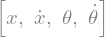

In [24]:
y = [x, x.diff(t), theta, theta.diff(t)]
y

Condiciones iniciales.

In [25]:
# biblioteca de cálculo numérico general
import numpy as np

In [26]:
# si se necesita un número como Pi, ahora este debe ser de numpy
y_inicial = [
    1, 0.5, np.pi/8, 0
    ] # [unidades SI] en el orden del vector de estado
t_rango = np.linspace(0, 30, 1000) # tiempos inicial,final y cuantos tiempos intermedios equiespaciados

Corrida de integración.

In [27]:
x_pp_lambda = sm.lambdify(y, x_pp_magnitudes) # [m s-2], y es el vector de estado
theta_pp_lambda = sm.lambdify(y, theta_pp_magnitudes) # [m s-2]

In [28]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# y : lista de estado con [y[0], y[1], y[2], y[3]]
# y[0]: x
# y[1]: x punto
# y[2]: theta
# y[3]: theta punto
# dydt : lista de derivadas
def y_punto(t, y):
    dydt = [y[1],
            x_pp_lambda(y[0], y[1], y[2], y[3]),
            y[3],
            theta_pp_lambda(y[0], y[1], y[2], y[3]),
           ]
    return dydt

In [29]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
# Importo la función solve_ivp: resolver un sistema de ODEs con condiciones iniciales
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp

In [30]:
# Integración de a pasos en el tiempo
y_ode2 = solve_ivp(y_punto, (t_rango[0], t_rango[-1] ), y_inicial, t_eval = t_rango)

### Graficación

In [31]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{x}$ [m/s]'),
 Text(0.5, 1.0, 'Velocidad')]

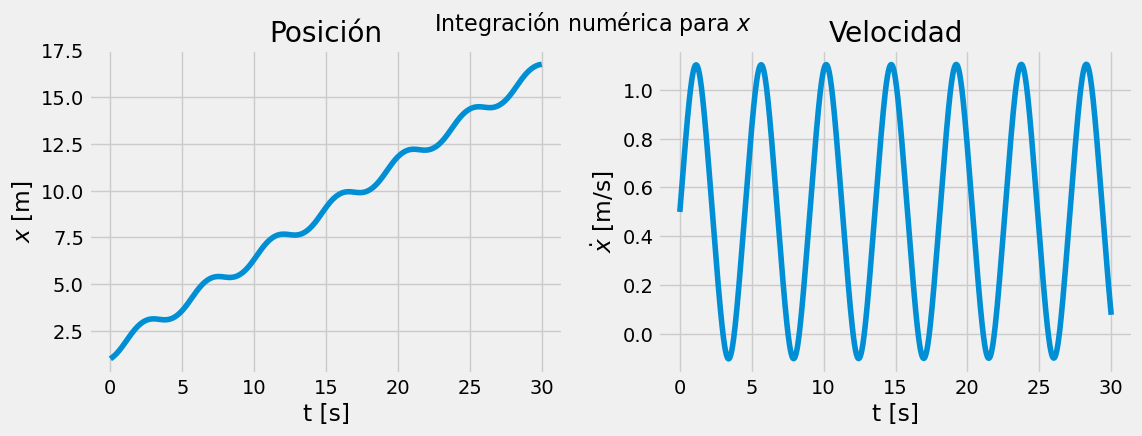

In [32]:
solucion = y_ode2
nombreCoordenada = 'x'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, solucion.y[0]) # posición x
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [m]', title='Posición')
ax[0,1].plot(solucion.t, solucion.y[1]) # velocidad x
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [m/s]', title='Velocidad')

## Animación

In [33]:
import matplotlib.animation as animation
from matplotlib.patches import Circle
from IPython.display import HTML

In [34]:
L = b_magnitud
R = a_magnitud
dt = y_ode2.t[1]

x1 = y_ode2.y[0]
y1 = x1 * 0

x2 = L*np.sin(y_ode2.y[2]) + x1
y2 = -L*np.cos(y_ode2.y[2]) + y1


In [35]:
# Selección del estilo de los gráficos:

# plt.style.use('dark_background')
plt.style.use('classic')


# Jugar con los siguientes valores hasta conseguir el resultado deseado.
# Tamaño de la figura:
figsize = (6,5)
# Límites del gráfico:
xL1 = -L
xL2 = 4*L 
yL1 = -9
yL2 = 2.5 
#Posición del título (si se incluye un título):
xtit = 0.5
ytit = 1.5
# Tiempos para la animación:
interval = dt*1000  # Tiempo entre cuadros en ms.
length = len(y_ode2.t) # Duración de la película en cuadros.


# Creación de las figuras y su animación:
fig = plt.figure(figsize=figsize)
ax = plt.subplot(frameon=False, xlim=(xL1, xL2), ylim=(yL1, yL2))
ax.set_aspect('equal') # Mantiene la misma escala en x e y.
ax.grid() # Sin grilla
ax.set_xticks([]) # Sin ejes
ax.set_yticks([]) # Sin ejes

# Gráfico de una línea (el piso sobre el cual se mueve el disco).
# (El centro del disco está en y=0, el piso en y=-R)
ax.plot([xL1, xL2], [-R, -R], '-', lw=0.75, color='black')

# La cuerda es un objeto "line" al cual se le irán actualizando
# las coordenadas.
line, = ax.plot([], 'o-', lw=2, color='black')

# Se dibuja el disco en la posición inicial.
circ = Circle((x1[0], y1[0]), R)
ax.add_artist(circ)


# Un título en 2 partes con diferentes fuentes.
ax.text(xtit, ytit, "DISCO PENDULO / ", transform=ax.transAxes,
        ha="right", va="bottom", color="b",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(xtit, ytit, "ANGULOS PEQUEÑOS", transform=ax.transAxes,
        ha="left", va="bottom", color="b",
        family="sans-serif", fontweight="bold", fontsize=16)

# Función que actualiza las coordenadas de los objetos,
# donde se puede agregar toda la lógica necesaria, como
# agregar nuevos objetos o desaparecerlos.
def animate(i):
    thisx = [x1[i], x2[i]]
    thisy = [y1[i], y2[i]]

    line.set_data(thisx, thisy)
    circ.center = x1[i], y1[i]
    return line, circ

# Método que crea la animación.
ani = animation.FuncAnimation(
    fig, animate, length, interval=interval, blit=False)

# Cerramos las figuras para que no se acumulen.
plt.close()

# ani.to_html5_video() genera el código necesario para ser embebido en una
# página web. La función HTML() muestra el video dentro del cuaderno Jupyter.
HTML(ani.to_html5_video())


In [36]:
# Si queremos guardar la animación directamente en un archivo sin mostrarla en el cuaderno:

# f = r"animation.mp4" 
# writervideo = animation.FFMpegWriter(fps=60) 
# ani.save(f, writer=writervideo)

## Sin aproximación de oscilaciones pequeñas

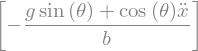

In [37]:
theta_sol = sm.solve(theta_EL, theta.diff(t, t))
theta_sol

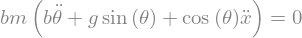

In [38]:
theta_EL

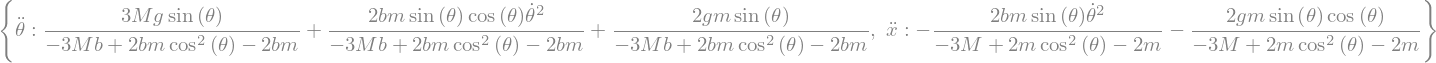

In [39]:
aceleraciones = sm.solve([x_EL, theta_EL], [x.diff(t, t), theta.diff(t, t)])
aceleraciones

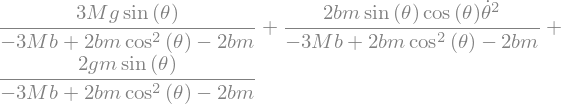

In [40]:
aceleraciones[theta.diff(t,t)]


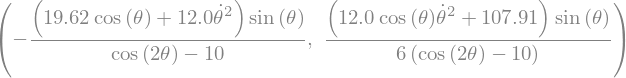

In [41]:
# parámetros_físicos
g_magnitud = 9.81 # [m s-2]
m_magnitud = 1 # [kg]
M_magnitud = 3 # [kg]
a_magnitud = 2 # [m]
b_magnitud = 6 # [m]
magnitudes = {
    g : g_magnitud,
    m : m_magnitud,
    M : M_magnitud,
    a : a_magnitud,
    b : b_magnitud,
}
x_pp_magnitudes = aceleraciones[x.diff(t,t)].subs(magnitudes).simplify() # [m s-2]
theta_pp_magnitudes = aceleraciones[theta.diff(t,t)].subs(magnitudes).simplify() # [m s-2]
x_pp_magnitudes, theta_pp_magnitudes

In [42]:
# Vector de estado:
y = [x, x.diff(t), theta, theta.diff(t)]

# Condiciones iniciales:
y_inicial = [
    # 1, 0, -4*np.pi/9, 0
    1, 0, 0, 10
    ] # [unidades SI] en el orden del vector de estado

# Tiempos inicial,final y cuántos tiempos intermedios equiespaciados
t_rango = np.linspace(0, 30, 1000)

# Integración:
x_pp_lambda = sm.lambdify(y, x_pp_magnitudes) # [m s-2], y es el vector de estado
theta_pp_lambda = sm.lambdify(y, theta_pp_magnitudes) # [m s-2]

def y_punto(t, y):
    # t : no se usa en este sistema pero lo dejamos para uso posterior
    # y : lista de estado con [y[0], y[1], y[2], y[3]]
    # y[0]: x
    # y[1]: x punto
    # y[2]: theta
    # y[3]: theta punto
    # dydt : lista de derivadas
    dydt = [y[1],
            x_pp_lambda(y[0], y[1], y[2], y[3]),
            y[3],
            theta_pp_lambda(y[0], y[1], y[2], y[3]),
           ]
    return dydt

y_ode2 = solve_ivp(y_punto, (t_rango[0], t_rango[-1] ), y_inicial, t_eval = t_rango)

In [43]:
L = b_magnitud
R = a_magnitud
dt = y_ode2.t[1]


x1 = y_ode2.y[0]
y1 = x1 * 0

x2 = L*np.sin(y_ode2.y[2]) + x1
y2 = -L*np.cos(y_ode2.y[2]) + y1

In [44]:
# Selección del estilo de los gráficos:

# plt.style.use('dark_background')
plt.style.use('classic')


# Jugar con los siguientes valores hasta conseguir el resultado deseado.

# Tamaño de la figura:
figsize = (10,5)
# Límites del gráfico:
xL1 = -3
xL2 = 75 
yL1 = -6.5
yL2 = 9 
#Posición del título (si se incluye un título):
xtit = 0.5
ytit = 1
# Tiempos para la animación:
interval = dt*1000  # Tiempo entre cuadros en ms.
length = np.int64(1/5*len(y_ode2.t)) # Duración de la película en cuadros.

# Creación de las figuras y su animación:
fig = plt.figure(figsize=figsize)
ax = plt.subplot(frameon=False, xlim=(xL1, xL2), ylim=(yL1, yL2))
ax.set_aspect('equal') # Mantiene la misma escala en x e y.
ax.grid() # Sin grilla
ax.set_xticks([]) # Sin ejes
ax.set_yticks([]) # Sin ejes

# Gráfico de una línea (el piso sobre el cual se mueve el disco).
# (El centro del disco está en y=0, el piso en y=-R)
ax.plot([xL1, xL2], [-R, -R], '-', lw=0.75, color='black')

# La cuerda es un objeto "line" al cual se le irán actualizando
# las coordenadas.
line, = ax.plot([], 'o-', lw=2, color='black')

# Se dibuja el disco en la posición inicial.
circ = Circle((x1[0], y1[0]), R)
ax.add_artist(circ)


# Un título en 2 partes con diferentes fuentes.
ax.text(xtit, ytit, "DISCO PENDULO / ", transform=ax.transAxes,
        ha="right", va="bottom", color="b",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(xtit, ytit, "ANGULOS GRANDES", transform=ax.transAxes,
        ha="left", va="bottom", color="b",
        family="sans-serif", fontweight="bold", fontsize=16)

# Función que actualiza las coordenadas de los objetos,
# donde se puede agregar toda la lógica necesaria, como
# agregar nuevos objetos o desaparecerlos.
def animate(i):
    thisx = [x1[i], x2[i]]
    thisy = [y1[i], y2[i]]

    line.set_data(thisx, thisy)
    circ.center = x1[i], y1[i]
    return line, circ

# Método que crea la animación.
ani = animation.FuncAnimation(
    fig, animate, length, interval=interval, blit=False)

# Cerramos las figuras para que no se acumulen.
plt.close()

# ani.to_html5_video() genera el código necesario para ser embebido en una
# página web. La función HTML() muestra el video dentro del cuaderno Jupyter.
HTML(ani.to_html5_video())

In [46]:
# Pendiente:

# Agregar a las animaciones un diagrama de las condiciones inciales: V=0, flecha de velocidad inicial, esas cosas, con una foto que dure un par de segundos, y que las anotaciones haga fadeout hasta que comience el movimiento, como un contador.
# "A continuación tenemos el mismo código para crear la animación que se usó antes, pero esta vez agregamos información sobre las condiciones iniciales. Para eso es necesario escribir una función animate(i) más compleja."

# Agregar el caso: v=0, ángulo -90, de forma que el CM esté quieto. Con muchas velocidad angular para que de la vuelta y otro con poca velocidad para que no pueda completar la vuelta. 

# Analizar si la cuerda deja de estar tensa.